In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Checking for maximum and minimum values to decide what will be the cut off point
company["Sales"].min()
company["Sales"].max()
company["Sales"].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [5]:
#Converting it Sales variable into categorical data i.e we have bucketed the data into two levels.
# Less than 7.5 and greater than 7.5

In [6]:
#Knowing the middle value by looking into median so that i find the middle value to check to divide data into two levels.
np.median(company["Sales"])
company["sales"]= "<=7.49"
company.loc[company["Sales"]>=7.49,"sales"]=">=7.49"

In [7]:
company["sales"].unique()
company["sales"].value_counts()

>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [8]:
#Dropping Sales column from the data 
company.drop(["Sales"],axis=1,inplace = True)

In [9]:
# Company data has no null values
company.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [10]:
#Checking the data type
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [11]:
#As, the fit does not consider the String data, we need to encode the data.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
for column_name in company.columns:
    if company[column_name].dtype == object:
        company[column_name] = le.fit_transform(company[column_name])
    else:
        pass

In [12]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


<AxesSubplot:xlabel='Advertising'>

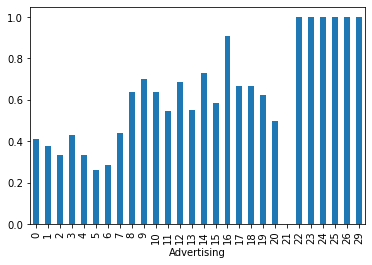

In [23]:
company.groupby('Advertising').sales.mean().plot(kind='bar')

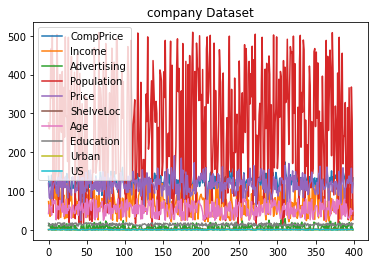

In [16]:
# get columns to plot
columns = company.columns.drop(['sales'])
# create x data
x_data = range(0, company.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, company[column], label=column)
# set title and legend
ax.set_title('company Dataset')
ax.legend()

Text(0, 0.5, 'sales')

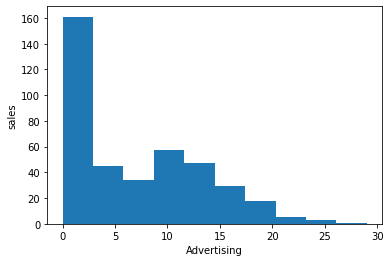

In [22]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(company['Advertising'])
# set title and labels
ax.set_xlabel('Advertising')
ax.set_ylabel('sales')

<AxesSubplot:xlabel='Urban'>

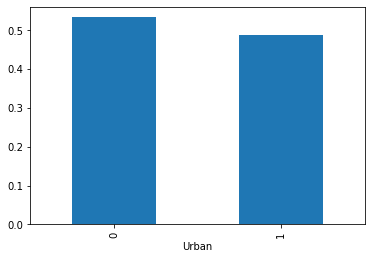

In [30]:
company.groupby('Urban').sales.mean().plot(kind='bar')

<AxesSubplot:xlabel='ShelveLoc'>

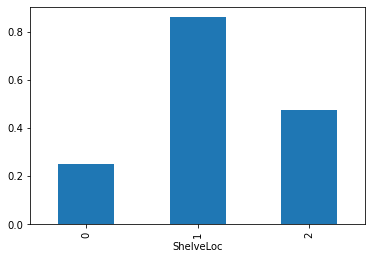

In [31]:
company.groupby('ShelveLoc').sales.mean().plot(kind='bar')

In [11]:
features = company.iloc[:,0:10] 
labels = company.iloc[:,10]

In [12]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,stratify = labels)

In [14]:
y_train.value_counts()
y_test.value_counts()

0    60
1    60
Name: sales, dtype: int64

In [15]:
#Building the model
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
model = DT(criterion='entropy', max_depth=3) 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

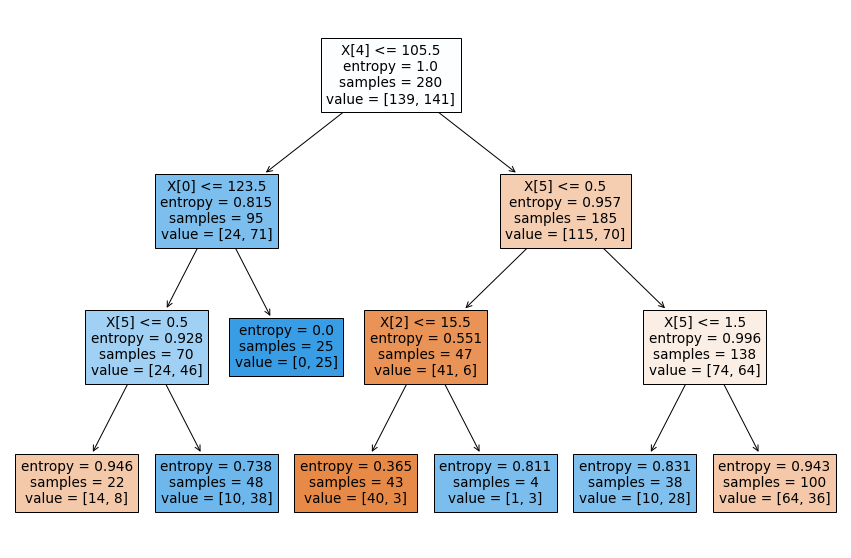

In [26]:
#PLot the decision tree
from sklearn import tree
plt.figure (figsize = (15,10))
tree.plot_tree(model, filled = True);

In [18]:
#prediction on Training data
pred_train = pd.DataFrame(model.predict(x_train))

In [19]:
#Finding Accuracy for train data
acc_train = accuracy_score(y_train,pred_train)
print(accuracy_score(y_train,pred_train))

1.0


In [20]:
# Confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_train,pred_train,))

In [21]:
#prediction on test data
pred_test = pd.DataFrame(model.predict(x_test))

In [22]:
#Accuracy on test data
acc_test = accuracy_score(y_test,pred_test)
print(accuracy_score(y_test,pred_test))

0.75
